## 4.8 분류 실습 - 캐글 산탄데르 고객 만족 예측

산탄데르 고객 만족 예측 분석은 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측하는 것이다.

### 데이터 전처리

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
print(cust_df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [6]:
# 클래스 레이블 명은 TARGET이고, 1이면 불만을 가진 고객, 0이면 만족한 고객을 의미
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

unsatisfied 비율은 0.04


In [7]:
# 피처의 값 분포를 확인
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


- var3 칼럼에서 min은 -999999이다.
=> var3은 숫자형이고, 다른 값에 비해 -999999는 너무 편차가 심하므로 가장 값이 많은 2로 변환한다.
- ID 피처는 단순 식별자이므로 드롭

In [8]:
# 상위 10새
print(cust_df.var3.value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [9]:
# var 칼럼 중 특정 예외 값 변환
# ID 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

In [10]:
# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [11]:
X_features.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [12]:
y_labels.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: TARGET, dtype: int64

In [13]:
# 비대칭한 데이터 세트이므로 클래스인 Target 값 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출됐는지 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로 random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로,조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro') # predict_proba : 레이블 값이 1일 때 예측 확률
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

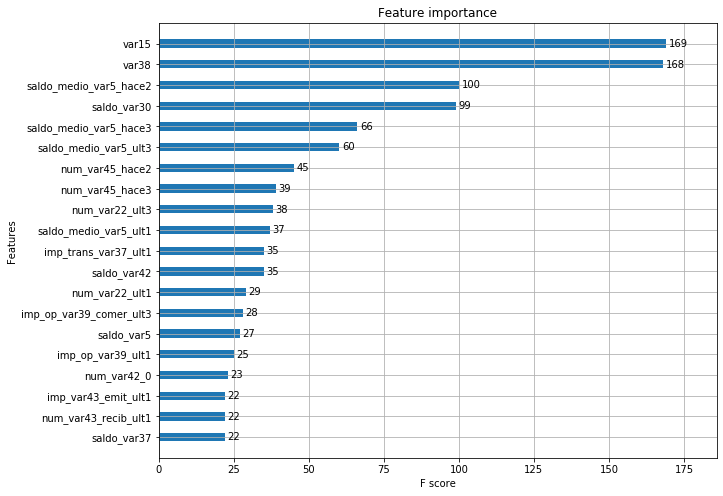

In [20]:
# 피처 중요도 그래프
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

XGBoost의 예측 성능을 좌우하는 가장 중요한 피처는 var38, var15 순이다.

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [21]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [22]:
# GridSearchCV로 하이퍼 파라미터에 대한 튜닝 수행

from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.83226	valid_0's binary_logloss: 0.147159	valid_1's auc: 0.826532	valid_1's binary_logloss: 0.156352
[4]	valid_0's auc: 0.83864	valid_0's binary_logloss: 0.144127	valid_1's auc: 0.833168	valid_1's binary_logloss: 0.153405
[5]	valid_0's auc: 0.842819	valid_0's binary_logloss: 0.141724	valid_1's auc: 0.836452	valid_1's binary_logloss: 0.151172
[6]	valid_0's auc: 0.844713	valid_0's binary_logloss: 0.139641	valid_1's auc: 0.837096	valid_1's binary_logloss: 0.149362
[7]	valid_0's auc: 0.847143	valid_0's binary_logloss: 0.137939	valid_1's auc: 0.837966	valid_1's binary_logloss: 0.147858
[8]	valid_0's auc: 0.848343	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837937	va

[33]	valid_0's auc: 0.87697	valid_0's binary_logloss: 0.123183	valid_1's auc: 0.83874	valid_1's binary_logloss: 0.139328
[34]	valid_0's auc: 0.87761	valid_0's binary_logloss: 0.122944	valid_1's auc: 0.839094	valid_1's binary_logloss: 0.13926
[35]	valid_0's auc: 0.878436	valid_0's binary_logloss: 0.122708	valid_1's auc: 0.839157	valid_1's binary_logloss: 0.139259
[36]	valid_0's auc: 0.878894	valid_0's binary_logloss: 0.122547	valid_1's auc: 0.838792	valid_1's binary_logloss: 0.13929
[37]	valid_0's auc: 0.879412	valid_0's binary_logloss: 0.122314	valid_1's auc: 0.838619	valid_1's binary_logloss: 0.139313
[38]	valid_0's auc: 0.880247	valid_0's binary_logloss: 0.122002	valid_1's auc: 0.838778	valid_1's binary_logloss: 0.139261
[39]	valid_0's auc: 0.880647	valid_0's binary_logloss: 0.121833	valid_1's auc: 0.838606	valid_1's binary_logloss: 0.139296
[40]	valid_0's auc: 0.881228	valid_0's binary_logloss: 0.121608	valid_1's auc: 0.838415	valid_1's binary_logloss: 0.139339
[41]	valid_0's auc: 0

[57]	valid_0's auc: 0.888491	valid_0's binary_logloss: 0.118555	valid_1's auc: 0.836609	valid_1's binary_logloss: 0.139767
[58]	valid_0's auc: 0.888651	valid_0's binary_logloss: 0.118407	valid_1's auc: 0.836597	valid_1's binary_logloss: 0.139755
[59]	valid_0's auc: 0.888861	valid_0's binary_logloss: 0.11828	valid_1's auc: 0.836679	valid_1's binary_logloss: 0.139786
[60]	valid_0's auc: 0.88899	valid_0's binary_logloss: 0.118164	valid_1's auc: 0.836859	valid_1's binary_logloss: 0.13973
[61]	valid_0's auc: 0.889636	valid_0's binary_logloss: 0.117922	valid_1's auc: 0.837033	valid_1's binary_logloss: 0.139681
[62]	valid_0's auc: 0.890128	valid_0's binary_logloss: 0.117717	valid_1's auc: 0.836955	valid_1's binary_logloss: 0.139658
[63]	valid_0's auc: 0.890317	valid_0's binary_logloss: 0.117597	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.139643
[64]	valid_0's auc: 0.890438	valid_0's binary_logloss: 0.117485	valid_1's auc: 0.836975	valid_1's binary_logloss: 0.139715
[65]	valid_0's auc:

[13]	valid_0's auc: 0.858131	valid_0's binary_logloss: 0.13156	valid_1's auc: 0.83943	valid_1's binary_logloss: 0.142316
[14]	valid_0's auc: 0.858979	valid_0's binary_logloss: 0.130862	valid_1's auc: 0.839497	valid_1's binary_logloss: 0.141824
[15]	valid_0's auc: 0.860918	valid_0's binary_logloss: 0.130161	valid_1's auc: 0.840139	valid_1's binary_logloss: 0.141424
[16]	valid_0's auc: 0.861717	valid_0's binary_logloss: 0.129583	valid_1's auc: 0.83971	valid_1's binary_logloss: 0.141114
[17]	valid_0's auc: 0.862415	valid_0's binary_logloss: 0.129063	valid_1's auc: 0.839704	valid_1's binary_logloss: 0.140791
[18]	valid_0's auc: 0.86309	valid_0's binary_logloss: 0.128584	valid_1's auc: 0.839591	valid_1's binary_logloss: 0.140546
[19]	valid_0's auc: 0.864022	valid_0's binary_logloss: 0.128064	valid_1's auc: 0.840022	valid_1's binary_logloss: 0.140272
[20]	valid_0's auc: 0.865437	valid_0's binary_logloss: 0.127545	valid_1's auc: 0.839323	valid_1's binary_logloss: 0.140139
[21]	valid_0's auc: 

[38]	valid_0's auc: 0.87932	valid_0's binary_logloss: 0.122151	valid_1's auc: 0.838765	valid_1's binary_logloss: 0.139427
[39]	valid_0's auc: 0.880051	valid_0's binary_logloss: 0.12192	valid_1's auc: 0.838411	valid_1's binary_logloss: 0.13948
[40]	valid_0's auc: 0.880456	valid_0's binary_logloss: 0.12174	valid_1's auc: 0.83882	valid_1's binary_logloss: 0.13942
[41]	valid_0's auc: 0.881087	valid_0's binary_logloss: 0.121505	valid_1's auc: 0.839233	valid_1's binary_logloss: 0.13928
[42]	valid_0's auc: 0.881924	valid_0's binary_logloss: 0.121263	valid_1's auc: 0.839058	valid_1's binary_logloss: 0.1393
[43]	valid_0's auc: 0.882333	valid_0's binary_logloss: 0.12107	valid_1's auc: 0.838966	valid_1's binary_logloss: 0.139337
[44]	valid_0's auc: 0.882863	valid_0's binary_logloss: 0.120842	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139326
[45]	valid_0's auc: 0.88324	valid_0's binary_logloss: 0.120663	valid_1's auc: 0.838864	valid_1's binary_logloss: 0.139328
[46]	valid_0's auc: 0.88371

[34]	valid_0's auc: 0.894171	valid_0's binary_logloss: 0.116861	valid_1's auc: 0.828104	valid_1's binary_logloss: 0.141614
[35]	valid_0's auc: 0.89532	valid_0's binary_logloss: 0.116521	valid_1's auc: 0.828225	valid_1's binary_logloss: 0.141645
[36]	valid_0's auc: 0.895747	valid_0's binary_logloss: 0.116229	valid_1's auc: 0.827658	valid_1's binary_logloss: 0.141722
[37]	valid_0's auc: 0.896407	valid_0's binary_logloss: 0.115915	valid_1's auc: 0.827323	valid_1's binary_logloss: 0.141845
Early stopping, best iteration is:
[7]	valid_0's auc: 0.859736	valid_0's binary_logloss: 0.135616	valid_1's auc: 0.835955	valid_1's binary_logloss: 0.147738
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841023	valid_0's binary_logloss: 0.149872	valid_1's auc: 0.820519	valid_1's binary_logloss: 0.159684
[3]	valid_0's auc: 0.850594	valid_0's binary_lo

[20]	valid_0's auc: 0.88065	valid_0's binary_logloss: 0.122882	valid_1's auc: 0.837466	valid_1's binary_logloss: 0.140594
[21]	valid_0's auc: 0.882101	valid_0's binary_logloss: 0.122217	valid_1's auc: 0.838749	valid_1's binary_logloss: 0.140371
[22]	valid_0's auc: 0.88298	valid_0's binary_logloss: 0.121657	valid_1's auc: 0.839245	valid_1's binary_logloss: 0.140183
[23]	valid_0's auc: 0.884199	valid_0's binary_logloss: 0.121115	valid_1's auc: 0.839557	valid_1's binary_logloss: 0.140018
[24]	valid_0's auc: 0.885105	valid_0's binary_logloss: 0.120643	valid_1's auc: 0.83956	valid_1's binary_logloss: 0.139907
[25]	valid_0's auc: 0.886029	valid_0's binary_logloss: 0.120185	valid_1's auc: 0.839523	valid_1's binary_logloss: 0.139828
[26]	valid_0's auc: 0.887072	valid_0's binary_logloss: 0.11965	valid_1's auc: 0.839483	valid_1's binary_logloss: 0.13977
[27]	valid_0's auc: 0.88822	valid_0's binary_logloss: 0.119195	valid_1's auc: 0.839836	valid_1's binary_logloss: 0.139628
[28]	valid_0's auc: 0.

[26]	valid_0's auc: 0.885607	valid_0's binary_logloss: 0.120078	valid_1's auc: 0.829107	valid_1's binary_logloss: 0.141578
[27]	valid_0's auc: 0.886751	valid_0's binary_logloss: 0.119632	valid_1's auc: 0.828532	valid_1's binary_logloss: 0.141584
[28]	valid_0's auc: 0.888485	valid_0's binary_logloss: 0.119181	valid_1's auc: 0.828673	valid_1's binary_logloss: 0.14156
[29]	valid_0's auc: 0.88893	valid_0's binary_logloss: 0.118841	valid_1's auc: 0.82865	valid_1's binary_logloss: 0.141546
[30]	valid_0's auc: 0.890017	valid_0's binary_logloss: 0.118403	valid_1's auc: 0.828737	valid_1's binary_logloss: 0.14149
[31]	valid_0's auc: 0.891449	valid_0's binary_logloss: 0.117964	valid_1's auc: 0.829087	valid_1's binary_logloss: 0.141428
[32]	valid_0's auc: 0.892469	valid_0's binary_logloss: 0.117539	valid_1's auc: 0.828856	valid_1's binary_logloss: 0.141429
[33]	valid_0's auc: 0.893194	valid_0's binary_logloss: 0.117203	valid_1's auc: 0.828511	valid_1's binary_logloss: 0.141502
[34]	valid_0's auc: 

[10]	valid_0's auc: 0.86431	valid_0's binary_logloss: 0.131259	valid_1's auc: 0.83691	valid_1's binary_logloss: 0.144375
[11]	valid_0's auc: 0.866274	valid_0's binary_logloss: 0.130114	valid_1's auc: 0.836468	valid_1's binary_logloss: 0.143756
[12]	valid_0's auc: 0.867685	valid_0's binary_logloss: 0.129024	valid_1's auc: 0.835997	valid_1's binary_logloss: 0.143276
[13]	valid_0's auc: 0.870476	valid_0's binary_logloss: 0.128053	valid_1's auc: 0.836052	valid_1's binary_logloss: 0.142714
[14]	valid_0's auc: 0.872211	valid_0's binary_logloss: 0.127173	valid_1's auc: 0.836341	valid_1's binary_logloss: 0.142282
[15]	valid_0's auc: 0.873643	valid_0's binary_logloss: 0.126354	valid_1's auc: 0.836409	valid_1's binary_logloss: 0.141917
[16]	valid_0's auc: 0.875137	valid_0's binary_logloss: 0.125538	valid_1's auc: 0.835436	valid_1's binary_logloss: 0.141676
[17]	valid_0's auc: 0.876406	valid_0's binary_logloss: 0.124821	valid_1's auc: 0.83571	valid_1's binary_logloss: 0.14136
[18]	valid_0's auc: 

[18]	valid_0's auc: 0.860907	valid_0's binary_logloss: 0.129329	valid_1's auc: 0.836588	valid_1's binary_logloss: 0.141396
[19]	valid_0's auc: 0.861719	valid_0's binary_logloss: 0.128878	valid_1's auc: 0.83668	valid_1's binary_logloss: 0.14115
[20]	valid_0's auc: 0.862608	valid_0's binary_logloss: 0.128474	valid_1's auc: 0.836052	valid_1's binary_logloss: 0.141105
[21]	valid_0's auc: 0.863176	valid_0's binary_logloss: 0.128127	valid_1's auc: 0.835457	valid_1's binary_logloss: 0.141036
[22]	valid_0's auc: 0.863935	valid_0's binary_logloss: 0.127781	valid_1's auc: 0.83531	valid_1's binary_logloss: 0.1409
[23]	valid_0's auc: 0.865522	valid_0's binary_logloss: 0.127374	valid_1's auc: 0.83518	valid_1's binary_logloss: 0.140815
[24]	valid_0's auc: 0.866059	valid_0's binary_logloss: 0.127036	valid_1's auc: 0.834972	valid_1's binary_logloss: 0.140785
[25]	valid_0's auc: 0.867338	valid_0's binary_logloss: 0.126686	valid_1's auc: 0.835368	valid_1's binary_logloss: 0.140651
[26]	valid_0's auc: 0.

[44]	valid_0's auc: 0.880265	valid_0's binary_logloss: 0.121866	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.139379
[45]	valid_0's auc: 0.880711	valid_0's binary_logloss: 0.1217	valid_1's auc: 0.838242	valid_1's binary_logloss: 0.139346
[46]	valid_0's auc: 0.881325	valid_0's binary_logloss: 0.121458	valid_1's auc: 0.838291	valid_1's binary_logloss: 0.13933
[47]	valid_0's auc: 0.881857	valid_0's binary_logloss: 0.12126	valid_1's auc: 0.838128	valid_1's binary_logloss: 0.139384
[48]	valid_0's auc: 0.882385	valid_0's binary_logloss: 0.121048	valid_1's auc: 0.837916	valid_1's binary_logloss: 0.139445
[49]	valid_0's auc: 0.882757	valid_0's binary_logloss: 0.12088	valid_1's auc: 0.837744	valid_1's binary_logloss: 0.139476
[50]	valid_0's auc: 0.883351	valid_0's binary_logloss: 0.120686	valid_1's auc: 0.837345	valid_1's binary_logloss: 0.139526
[51]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.120513	valid_1's auc: 0.83731	valid_1's binary_logloss: 0.139557
[52]	valid_0's auc: 0.

[51]	valid_0's auc: 0.88334	valid_0's binary_logloss: 0.120858	valid_1's auc: 0.837583	valid_1's binary_logloss: 0.139809
[52]	valid_0's auc: 0.883706	valid_0's binary_logloss: 0.120693	valid_1's auc: 0.837552	valid_1's binary_logloss: 0.139833
[53]	valid_0's auc: 0.883986	valid_0's binary_logloss: 0.120532	valid_1's auc: 0.837649	valid_1's binary_logloss: 0.139801
[54]	valid_0's auc: 0.884354	valid_0's binary_logloss: 0.120355	valid_1's auc: 0.837558	valid_1's binary_logloss: 0.139841
[55]	valid_0's auc: 0.884969	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.83774	valid_1's binary_logloss: 0.139823
[56]	valid_0's auc: 0.885421	valid_0's binary_logloss: 0.120001	valid_1's auc: 0.837617	valid_1's binary_logloss: 0.139877
[57]	valid_0's auc: 0.885743	valid_0's binary_logloss: 0.119849	valid_1's auc: 0.837594	valid_1's binary_logloss: 0.139878
[58]	valid_0's auc: 0.886059	valid_0's binary_logloss: 0.119635	valid_1's auc: 0.837745	valid_1's binary_logloss: 0.139832
[59]	valid_0's auc

[8]	valid_0's auc: 0.851939	valid_0's binary_logloss: 0.136895	valid_1's auc: 0.838937	valid_1's binary_logloss: 0.146084
[9]	valid_0's auc: 0.852907	valid_0's binary_logloss: 0.135703	valid_1's auc: 0.837929	valid_1's binary_logloss: 0.145052
[10]	valid_0's auc: 0.853977	valid_0's binary_logloss: 0.134637	valid_1's auc: 0.837229	valid_1's binary_logloss: 0.14428
[11]	valid_0's auc: 0.855135	valid_0's binary_logloss: 0.133701	valid_1's auc: 0.836247	valid_1's binary_logloss: 0.143597
[12]	valid_0's auc: 0.856669	valid_0's binary_logloss: 0.132839	valid_1's auc: 0.837853	valid_1's binary_logloss: 0.142801
[13]	valid_0's auc: 0.857466	valid_0's binary_logloss: 0.132074	valid_1's auc: 0.83809	valid_1's binary_logloss: 0.142261
[14]	valid_0's auc: 0.858424	valid_0's binary_logloss: 0.131411	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141787
[15]	valid_0's auc: 0.859369	valid_0's binary_logloss: 0.130774	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.141386
[16]	valid_0's auc: 

[17]	valid_0's auc: 0.860411	valid_0's binary_logloss: 0.12985	valid_1's auc: 0.836923	valid_1's binary_logloss: 0.141557
[18]	valid_0's auc: 0.861645	valid_0's binary_logloss: 0.129342	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.141395
[19]	valid_0's auc: 0.862557	valid_0's binary_logloss: 0.128893	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.141223
[20]	valid_0's auc: 0.863471	valid_0's binary_logloss: 0.128485	valid_1's auc: 0.836647	valid_1's binary_logloss: 0.140984
[21]	valid_0's auc: 0.864278	valid_0's binary_logloss: 0.128086	valid_1's auc: 0.83726	valid_1's binary_logloss: 0.140704
[22]	valid_0's auc: 0.864995	valid_0's binary_logloss: 0.127696	valid_1's auc: 0.838046	valid_1's binary_logloss: 0.140475
[23]	valid_0's auc: 0.866138	valid_0's binary_logloss: 0.127292	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.140377
[24]	valid_0's auc: 0.866691	valid_0's binary_logloss: 0.127014	valid_1's auc: 0.838081	valid_1's binary_logloss: 0.140266
[25]	valid_0's auc

[15]	valid_0's auc: 0.871508	valid_0's binary_logloss: 0.12764	valid_1's auc: 0.834599	valid_1's binary_logloss: 0.142151
[16]	valid_0's auc: 0.872884	valid_0's binary_logloss: 0.126929	valid_1's auc: 0.834492	valid_1's binary_logloss: 0.141973
[17]	valid_0's auc: 0.87377	valid_0's binary_logloss: 0.126255	valid_1's auc: 0.833747	valid_1's binary_logloss: 0.141817
[18]	valid_0's auc: 0.874607	valid_0's binary_logloss: 0.12566	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.141665
[19]	valid_0's auc: 0.875656	valid_0's binary_logloss: 0.125079	valid_1's auc: 0.832752	valid_1's binary_logloss: 0.141529
[20]	valid_0's auc: 0.877003	valid_0's binary_logloss: 0.124492	valid_1's auc: 0.832615	valid_1's binary_logloss: 0.141459
[21]	valid_0's auc: 0.878142	valid_0's binary_logloss: 0.123913	valid_1's auc: 0.831757	valid_1's binary_logloss: 0.141448
[22]	valid_0's auc: 0.879334	valid_0's binary_logloss: 0.123378	valid_1's auc: 0.83086	valid_1's binary_logloss: 0.141447
[23]	valid_0's auc: 

[41]	valid_0's auc: 0.896591	valid_0's binary_logloss: 0.115636	valid_1's auc: 0.835595	valid_1's binary_logloss: 0.139974
[42]	valid_0's auc: 0.89733	valid_0's binary_logloss: 0.115327	valid_1's auc: 0.835226	valid_1's binary_logloss: 0.140056
[43]	valid_0's auc: 0.897746	valid_0's binary_logloss: 0.115077	valid_1's auc: 0.835686	valid_1's binary_logloss: 0.14004
[44]	valid_0's auc: 0.898255	valid_0's binary_logloss: 0.114768	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.140109
[45]	valid_0's auc: 0.89867	valid_0's binary_logloss: 0.114503	valid_1's auc: 0.835085	valid_1's binary_logloss: 0.140197
[46]	valid_0's auc: 0.899109	valid_0's binary_logloss: 0.114293	valid_1's auc: 0.834982	valid_1's binary_logloss: 0.140232
[47]	valid_0's auc: 0.899521	valid_0's binary_logloss: 0.114059	valid_1's auc: 0.83503	valid_1's binary_logloss: 0.140244
[48]	valid_0's auc: 0.90004	valid_0's binary_logloss: 0.113779	valid_1's auc: 0.835199	valid_1's binary_logloss: 0.140251
[49]	valid_0's auc: 0

[55]	valid_0's auc: 0.901765	valid_0's binary_logloss: 0.112305	valid_1's auc: 0.835799	valid_1's binary_logloss: 0.140692
[56]	valid_0's auc: 0.902333	valid_0's binary_logloss: 0.112006	valid_1's auc: 0.835804	valid_1's binary_logloss: 0.140685
[57]	valid_0's auc: 0.902364	valid_0's binary_logloss: 0.111816	valid_1's auc: 0.836035	valid_1's binary_logloss: 0.140646
[58]	valid_0's auc: 0.902564	valid_0's binary_logloss: 0.1116	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.140761
[59]	valid_0's auc: 0.902898	valid_0's binary_logloss: 0.111396	valid_1's auc: 0.835803	valid_1's binary_logloss: 0.140824
[60]	valid_0's auc: 0.903038	valid_0's binary_logloss: 0.111186	valid_1's auc: 0.835604	valid_1's binary_logloss: 0.140871
[61]	valid_0's auc: 0.903215	valid_0's binary_logloss: 0.110981	valid_1's auc: 0.835545	valid_1's binary_logloss: 0.14095
[62]	valid_0's auc: 0.903412	valid_0's binary_logloss: 0.110786	valid_1's auc: 0.835259	valid_1's binary_logloss: 0.141032
[63]	valid_0's auc:

[13]	valid_0's auc: 0.86875	valid_0's binary_logloss: 0.129181	valid_1's auc: 0.83712	valid_1's binary_logloss: 0.1418
[14]	valid_0's auc: 0.869866	valid_0's binary_logloss: 0.128379	valid_1's auc: 0.837147	valid_1's binary_logloss: 0.141322
[15]	valid_0's auc: 0.87101	valid_0's binary_logloss: 0.127561	valid_1's auc: 0.836594	valid_1's binary_logloss: 0.140921
[16]	valid_0's auc: 0.872028	valid_0's binary_logloss: 0.126884	valid_1's auc: 0.837007	valid_1's binary_logloss: 0.140606
[17]	valid_0's auc: 0.873019	valid_0's binary_logloss: 0.12624	valid_1's auc: 0.837241	valid_1's binary_logloss: 0.140322
[18]	valid_0's auc: 0.874843	valid_0's binary_logloss: 0.125539	valid_1's auc: 0.837277	valid_1's binary_logloss: 0.140117
[19]	valid_0's auc: 0.876067	valid_0's binary_logloss: 0.124925	valid_1's auc: 0.836925	valid_1's binary_logloss: 0.13998
[20]	valid_0's auc: 0.877473	valid_0's binary_logloss: 0.124275	valid_1's auc: 0.83709	valid_1's binary_logloss: 0.13976
[21]	valid_0's auc: 0.878

[27]	valid_0's auc: 0.884537	valid_0's binary_logloss: 0.121015	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.140018
[28]	valid_0's auc: 0.885265	valid_0's binary_logloss: 0.120619	valid_1's auc: 0.837681	valid_1's binary_logloss: 0.139939
[29]	valid_0's auc: 0.885801	valid_0's binary_logloss: 0.120239	valid_1's auc: 0.837333	valid_1's binary_logloss: 0.139952
[30]	valid_0's auc: 0.886791	valid_0's binary_logloss: 0.119853	valid_1's auc: 0.837734	valid_1's binary_logloss: 0.139902
[31]	valid_0's auc: 0.887862	valid_0's binary_logloss: 0.119443	valid_1's auc: 0.837227	valid_1's binary_logloss: 0.13996
[32]	valid_0's auc: 0.888677	valid_0's binary_logloss: 0.119064	valid_1's auc: 0.837144	valid_1's binary_logloss: 0.13991
[33]	valid_0's auc: 0.889633	valid_0's binary_logloss: 0.118709	valid_1's auc: 0.837291	valid_1's binary_logloss: 0.139846
[34]	valid_0's auc: 0.890546	valid_0's binary_logloss: 0.118325	valid_1's auc: 0.837544	valid_1's binary_logloss: 0.139785
[35]	valid_0's auc

[33]	valid_0's auc: 0.875336	valid_0's binary_logloss: 0.123579	valid_1's auc: 0.83315	valid_1's binary_logloss: 0.1403
[34]	valid_0's auc: 0.876039	valid_0's binary_logloss: 0.12329	valid_1's auc: 0.833126	valid_1's binary_logloss: 0.140297
[35]	valid_0's auc: 0.876536	valid_0's binary_logloss: 0.123097	valid_1's auc: 0.832819	valid_1's binary_logloss: 0.140344
[36]	valid_0's auc: 0.877106	valid_0's binary_logloss: 0.122839	valid_1's auc: 0.832525	valid_1's binary_logloss: 0.140435
[37]	valid_0's auc: 0.877361	valid_0's binary_logloss: 0.122635	valid_1's auc: 0.832847	valid_1's binary_logloss: 0.140331
Early stopping, best iteration is:
[7]	valid_0's auc: 0.847143	valid_0's binary_logloss: 0.137939	valid_1's auc: 0.837966	valid_1's binary_logloss: 0.147858
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827243	valid_0's binary_loglo

[14]	valid_0's auc: 0.858522	valid_0's binary_logloss: 0.131004	valid_1's auc: 0.838028	valid_1's binary_logloss: 0.142375
[15]	valid_0's auc: 0.859315	valid_0's binary_logloss: 0.130413	valid_1's auc: 0.838488	valid_1's binary_logloss: 0.141944
[16]	valid_0's auc: 0.86069	valid_0's binary_logloss: 0.129807	valid_1's auc: 0.837964	valid_1's binary_logloss: 0.141574
[17]	valid_0's auc: 0.861924	valid_0's binary_logloss: 0.129245	valid_1's auc: 0.837477	valid_1's binary_logloss: 0.141319
[18]	valid_0's auc: 0.863115	valid_0's binary_logloss: 0.128723	valid_1's auc: 0.837718	valid_1's binary_logloss: 0.141021
[19]	valid_0's auc: 0.864085	valid_0's binary_logloss: 0.128231	valid_1's auc: 0.837989	valid_1's binary_logloss: 0.140808
[20]	valid_0's auc: 0.86526	valid_0's binary_logloss: 0.127771	valid_1's auc: 0.838523	valid_1's binary_logloss: 0.140544
[21]	valid_0's auc: 0.866836	valid_0's binary_logloss: 0.127288	valid_1's auc: 0.838366	valid_1's binary_logloss: 0.140453
[22]	valid_0's auc

[8]	valid_0's auc: 0.848343	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837937	valid_1's binary_logloss: 0.146541
[9]	valid_0's auc: 0.849594	valid_0's binary_logloss: 0.135324	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.145538
[10]	valid_0's auc: 0.85116	valid_0's binary_logloss: 0.134209	valid_1's auc: 0.837072	valid_1's binary_logloss: 0.144686
[11]	valid_0's auc: 0.852863	valid_0's binary_logloss: 0.133263	valid_1's auc: 0.837135	valid_1's binary_logloss: 0.143881
[12]	valid_0's auc: 0.85486	valid_0's binary_logloss: 0.13235	valid_1's auc: 0.837046	valid_1's binary_logloss: 0.143346
[13]	valid_0's auc: 0.855645	valid_0's binary_logloss: 0.131598	valid_1's auc: 0.837144	valid_1's binary_logloss: 0.14275
[14]	valid_0's auc: 0.857395	valid_0's binary_logloss: 0.130868	valid_1's auc: 0.83672	valid_1's binary_logloss: 0.142343
[15]	valid_0's auc: 0.858261	valid_0's binary_logloss: 0.130253	valid_1's auc: 0.836811	valid_1's binary_logloss: 0.141967
[16]	valid_0's auc: 0.8

[38]	valid_0's auc: 0.880247	valid_0's binary_logloss: 0.122002	valid_1's auc: 0.838778	valid_1's binary_logloss: 0.139261
[39]	valid_0's auc: 0.880647	valid_0's binary_logloss: 0.121833	valid_1's auc: 0.838606	valid_1's binary_logloss: 0.139296
[40]	valid_0's auc: 0.881228	valid_0's binary_logloss: 0.121608	valid_1's auc: 0.838415	valid_1's binary_logloss: 0.139339
[41]	valid_0's auc: 0.881836	valid_0's binary_logloss: 0.12136	valid_1's auc: 0.838567	valid_1's binary_logloss: 0.139348
[42]	valid_0's auc: 0.882508	valid_0's binary_logloss: 0.121096	valid_1's auc: 0.838007	valid_1's binary_logloss: 0.139453
[43]	valid_0's auc: 0.883176	valid_0's binary_logloss: 0.120834	valid_1's auc: 0.837842	valid_1's binary_logloss: 0.139483
[44]	valid_0's auc: 0.883641	valid_0's binary_logloss: 0.120622	valid_1's auc: 0.837993	valid_1's binary_logloss: 0.139479
[45]	valid_0's auc: 0.883976	valid_0's binary_logloss: 0.120466	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.13953
Early stopping, be

[59]	valid_0's auc: 0.888861	valid_0's binary_logloss: 0.11828	valid_1's auc: 0.836679	valid_1's binary_logloss: 0.139786
[60]	valid_0's auc: 0.88899	valid_0's binary_logloss: 0.118164	valid_1's auc: 0.836859	valid_1's binary_logloss: 0.13973
[61]	valid_0's auc: 0.889636	valid_0's binary_logloss: 0.117922	valid_1's auc: 0.837033	valid_1's binary_logloss: 0.139681
[62]	valid_0's auc: 0.890128	valid_0's binary_logloss: 0.117717	valid_1's auc: 0.836955	valid_1's binary_logloss: 0.139658
[63]	valid_0's auc: 0.890317	valid_0's binary_logloss: 0.117597	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.139643
[64]	valid_0's auc: 0.890438	valid_0's binary_logloss: 0.117485	valid_1's auc: 0.836975	valid_1's binary_logloss: 0.139715
[65]	valid_0's auc: 0.890715	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.836861	valid_1's binary_logloss: 0.139723
[66]	valid_0's auc: 0.891124	valid_0's binary_logloss: 0.117194	valid_1's auc: 0.836668	valid_1's binary_logloss: 0.139771
[67]	valid_0's auc:

[15]	valid_0's auc: 0.875099	valid_0's binary_logloss: 0.126008	valid_1's auc: 0.836995	valid_1's binary_logloss: 0.141676
[16]	valid_0's auc: 0.876953	valid_0's binary_logloss: 0.125166	valid_1's auc: 0.836793	valid_1's binary_logloss: 0.141405
[17]	valid_0's auc: 0.877963	valid_0's binary_logloss: 0.124414	valid_1's auc: 0.836098	valid_1's binary_logloss: 0.141205
[18]	valid_0's auc: 0.879923	valid_0's binary_logloss: 0.123656	valid_1's auc: 0.836591	valid_1's binary_logloss: 0.140982
[19]	valid_0's auc: 0.881456	valid_0's binary_logloss: 0.122962	valid_1's auc: 0.836481	valid_1's binary_logloss: 0.140739
[20]	valid_0's auc: 0.882462	valid_0's binary_logloss: 0.122374	valid_1's auc: 0.836654	valid_1's binary_logloss: 0.140621
[21]	valid_0's auc: 0.883307	valid_0's binary_logloss: 0.12179	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.140502
[22]	valid_0's auc: 0.884049	valid_0's binary_logloss: 0.121275	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.140295
[23]	valid_0's au

[41]	valid_0's auc: 0.900259	valid_0's binary_logloss: 0.113979	valid_1's auc: 0.838937	valid_1's binary_logloss: 0.13965
[42]	valid_0's auc: 0.900559	valid_0's binary_logloss: 0.113754	valid_1's auc: 0.838695	valid_1's binary_logloss: 0.139713
[43]	valid_0's auc: 0.901022	valid_0's binary_logloss: 0.113441	valid_1's auc: 0.837984	valid_1's binary_logloss: 0.139855
[44]	valid_0's auc: 0.901697	valid_0's binary_logloss: 0.113158	valid_1's auc: 0.838003	valid_1's binary_logloss: 0.139865
[45]	valid_0's auc: 0.901929	valid_0's binary_logloss: 0.1129	valid_1's auc: 0.838185	valid_1's binary_logloss: 0.139914
[46]	valid_0's auc: 0.902381	valid_0's binary_logloss: 0.112644	valid_1's auc: 0.838042	valid_1's binary_logloss: 0.139956
[47]	valid_0's auc: 0.902504	valid_0's binary_logloss: 0.112457	valid_1's auc: 0.837911	valid_1's binary_logloss: 0.140016
[48]	valid_0's auc: 0.903379	valid_0's binary_logloss: 0.112208	valid_1's auc: 0.83818	valid_1's binary_logloss: 0.140006
[49]	valid_0's auc: 

[8]	valid_0's auc: 0.863642	valid_0's binary_logloss: 0.133782	valid_1's auc: 0.835651	valid_1's binary_logloss: 0.146161
[9]	valid_0's auc: 0.866219	valid_0's binary_logloss: 0.132278	valid_1's auc: 0.835309	valid_1's binary_logloss: 0.145114
[10]	valid_0's auc: 0.867977	valid_0's binary_logloss: 0.130916	valid_1's auc: 0.836724	valid_1's binary_logloss: 0.144205
[11]	valid_0's auc: 0.869275	valid_0's binary_logloss: 0.129757	valid_1's auc: 0.837131	valid_1's binary_logloss: 0.143441
[12]	valid_0's auc: 0.8709	valid_0's binary_logloss: 0.128684	valid_1's auc: 0.837812	valid_1's binary_logloss: 0.142822
[13]	valid_0's auc: 0.872191	valid_0's binary_logloss: 0.12772	valid_1's auc: 0.837961	valid_1's binary_logloss: 0.142316
[14]	valid_0's auc: 0.873919	valid_0's binary_logloss: 0.126836	valid_1's auc: 0.837823	valid_1's binary_logloss: 0.141933
[15]	valid_0's auc: 0.875099	valid_0's binary_logloss: 0.126008	valid_1's auc: 0.836995	valid_1's binary_logloss: 0.141676
[16]	valid_0's auc: 0

[34]	valid_0's auc: 0.894447	valid_0's binary_logloss: 0.11644	valid_1's auc: 0.839267	valid_1's binary_logloss: 0.139587
[35]	valid_0's auc: 0.895256	valid_0's binary_logloss: 0.116106	valid_1's auc: 0.839058	valid_1's binary_logloss: 0.139617
[36]	valid_0's auc: 0.896634	valid_0's binary_logloss: 0.115742	valid_1's auc: 0.838936	valid_1's binary_logloss: 0.139645
[37]	valid_0's auc: 0.897498	valid_0's binary_logloss: 0.115385	valid_1's auc: 0.839175	valid_1's binary_logloss: 0.139598
[38]	valid_0's auc: 0.898179	valid_0's binary_logloss: 0.11501	valid_1's auc: 0.838541	valid_1's binary_logloss: 0.139722
[39]	valid_0's auc: 0.899	valid_0's binary_logloss: 0.114619	valid_1's auc: 0.838874	valid_1's binary_logloss: 0.139675
[40]	valid_0's auc: 0.899775	valid_0's binary_logloss: 0.114284	valid_1's auc: 0.839068	valid_1's binary_logloss: 0.139649
[41]	valid_0's auc: 0.900259	valid_0's binary_logloss: 0.113979	valid_1's auc: 0.838937	valid_1's binary_logloss: 0.13965
[42]	valid_0's auc: 0.

[40]	valid_0's auc: 0.877316	valid_0's binary_logloss: 0.123002	valid_1's auc: 0.834305	valid_1's binary_logloss: 0.140299
[41]	valid_0's auc: 0.877744	valid_0's binary_logloss: 0.1228	valid_1's auc: 0.834293	valid_1's binary_logloss: 0.140294
[42]	valid_0's auc: 0.878215	valid_0's binary_logloss: 0.122577	valid_1's auc: 0.834311	valid_1's binary_logloss: 0.140322
Early stopping, best iteration is:
[12]	valid_0's auc: 0.853263	valid_0's binary_logloss: 0.133057	valid_1's auc: 0.837277	valid_1's binary_logloss: 0.143425
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831972	valid_0's binary_logloss: 0.15114	valid_1's auc: 0.825313	valid_1's binary_logloss: 0.159689
[3]	valid_0's auc: 0.839479	valid_0's binary_logloss: 0.147332	valid_1's auc: 0.831825	valid_1's binary_logloss: 0.155998
[4]	valid_0's auc: 0.844012	valid_0's binary_logl

[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827896	valid_0's binary_logloss: 0.151332	valid_1's auc: 0.820562	valid_1's binary_logloss: 0.160238
[3]	valid_0's auc: 0.837508	valid_0's binary_logloss: 0.147484	valid_1's auc: 0.828412	valid_1's binary_logloss: 0.156539
[4]	valid_0's auc: 0.840369	valid_0's binary_logloss: 0.144424	valid_1's auc: 0.831297	valid_1's binary_logloss: 0.153568
[5]	valid_0's auc: 0.842926	valid_0's binary_logloss: 0.142072	valid_1's auc: 0.833393	valid_1's binary_logloss: 0.151349
[6]	valid_0's auc: 0.844085	valid_0's binary_logloss: 0.140149	valid_1's auc: 0.83399	valid_1's binary_logloss: 0.149527
[7]	valid_0's auc: 0.844938	valid_0's binary_logloss: 0.138476	valid_1's auc: 0.834477	valid_1's binary_logloss: 0.147981
[8]	valid_0's auc: 0.847391	valid_0's binary_logloss: 0.137063	valid_1's auc: 0.835707	

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82852	valid_0's binary_logloss: 0.151263	valid_1's auc: 0.822502	valid_1's binary_logloss: 0.160087
[3]	valid_0's auc: 0.835589	valid_0's binary_logloss: 0.14744	valid_1's auc: 0.82814	valid_1's binary_logloss: 0.15638
[4]	valid_0's auc: 0.839979	valid_0's binary_logloss: 0.14446	valid_1's auc: 0.833043	valid_1's binary_logloss: 0.153429
[5]	valid_0's auc: 0.843307	valid_0's binary_logloss: 0.142062	valid_1's auc: 0.834581	valid_1's binary_logloss: 0.151223
[6]	valid_0's auc: 0.845621	valid_0's binary_logloss: 0.140106	valid_1's auc: 0.834339	valid_1's binary_logloss: 0.149515
[7]	valid_0's auc: 0.847461	valid_0's binary_logloss: 0.138417	valid_1's auc: 0.834412	valid_1's binary_logloss: 0.148038
[8]	valid_0's auc: 0.848074	valid_0's binary_logloss: 0.137045	valid_1's auc: 0.835275	val

[27]	valid_0's auc: 0.8699	valid_0's binary_logloss: 0.125747	valid_1's auc: 0.838585	valid_1's binary_logloss: 0.139586
[28]	valid_0's auc: 0.870461	valid_0's binary_logloss: 0.125495	valid_1's auc: 0.838596	valid_1's binary_logloss: 0.139508
[29]	valid_0's auc: 0.871396	valid_0's binary_logloss: 0.125225	valid_1's auc: 0.838865	valid_1's binary_logloss: 0.139436
[30]	valid_0's auc: 0.872242	valid_0's binary_logloss: 0.12495	valid_1's auc: 0.838815	valid_1's binary_logloss: 0.139424
[31]	valid_0's auc: 0.873067	valid_0's binary_logloss: 0.124698	valid_1's auc: 0.838611	valid_1's binary_logloss: 0.139435
[32]	valid_0's auc: 0.873627	valid_0's binary_logloss: 0.124479	valid_1's auc: 0.839144	valid_1's binary_logloss: 0.139294
[33]	valid_0's auc: 0.873999	valid_0's binary_logloss: 0.124251	valid_1's auc: 0.83925	valid_1's binary_logloss: 0.13924
[34]	valid_0's auc: 0.874457	valid_0's binary_logloss: 0.123997	valid_1's auc: 0.839087	valid_1's binary_logloss: 0.139242
[35]	valid_0's auc: 0

[34]	valid_0's auc: 0.87381	valid_0's binary_logloss: 0.124427	valid_1's auc: 0.838597	valid_1's binary_logloss: 0.139684
[35]	valid_0's auc: 0.874382	valid_0's binary_logloss: 0.124199	valid_1's auc: 0.838608	valid_1's binary_logloss: 0.139681
[36]	valid_0's auc: 0.87477	valid_0's binary_logloss: 0.124005	valid_1's auc: 0.838663	valid_1's binary_logloss: 0.139643
[37]	valid_0's auc: 0.875502	valid_0's binary_logloss: 0.123731	valid_1's auc: 0.838605	valid_1's binary_logloss: 0.139649
[38]	valid_0's auc: 0.876347	valid_0's binary_logloss: 0.123462	valid_1's auc: 0.838567	valid_1's binary_logloss: 0.139654
[39]	valid_0's auc: 0.876956	valid_0's binary_logloss: 0.123224	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.139666
[40]	valid_0's auc: 0.877827	valid_0's binary_logloss: 0.122997	valid_1's auc: 0.838525	valid_1's binary_logloss: 0.139641
[41]	valid_0's auc: 0.878448	valid_0's binary_logloss: 0.122744	valid_1's auc: 0.838625	valid_1's binary_logloss: 0.139595
[42]	valid_0's auc

[32]	valid_0's auc: 0.889379	valid_0's binary_logloss: 0.118955	valid_1's auc: 0.829831	valid_1's binary_logloss: 0.141459
[33]	valid_0's auc: 0.889952	valid_0's binary_logloss: 0.118604	valid_1's auc: 0.829259	valid_1's binary_logloss: 0.141532
[34]	valid_0's auc: 0.890468	valid_0's binary_logloss: 0.118332	valid_1's auc: 0.828993	valid_1's binary_logloss: 0.141557
[35]	valid_0's auc: 0.891379	valid_0's binary_logloss: 0.117978	valid_1's auc: 0.829151	valid_1's binary_logloss: 0.141573
[36]	valid_0's auc: 0.891896	valid_0's binary_logloss: 0.117681	valid_1's auc: 0.829076	valid_1's binary_logloss: 0.141636
[37]	valid_0's auc: 0.892624	valid_0's binary_logloss: 0.117337	valid_1's auc: 0.829427	valid_1's binary_logloss: 0.141562
[38]	valid_0's auc: 0.893243	valid_0's binary_logloss: 0.117034	valid_1's auc: 0.829382	valid_1's binary_logloss: 0.141589
[39]	valid_0's auc: 0.893805	valid_0's binary_logloss: 0.1168	valid_1's auc: 0.829248	valid_1's binary_logloss: 0.141673
[40]	valid_0's auc

[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150491	valid_1's auc: 0.830464	valid_1's binary_logloss: 0.159668
[3]	valid_0's auc: 0.847195	valid_0's binary_logloss: 0.146302	valid_1's auc: 0.830858	valid_1's binary_logloss: 0.155981
[4]	valid_0's auc: 0.850359	valid_0's binary_logloss: 0.143085	valid_1's auc: 0.831	valid_1's binary_logloss: 0.153206
[5]	valid_0's auc: 0.853389	valid_0's binary_logloss: 0.140504	valid_1's auc: 0.832122	valid_1's binary_logloss: 0.15085
[6]	valid_0's auc: 0.855411	valid_0's binary_logloss: 0.1383	valid_1's auc: 0.833027	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.856639	valid_0's binary_logloss: 0.136528	valid_1's auc: 0.834256	valid_1's binary_logloss: 0.1475
[8]	valid_0's auc: 0.85833	valid_0's binary_logloss: 0.134929	valid_1's auc: 0.835412	valid_1

[6]	valid_0's auc: 0.855771	valid_0's binary_logloss: 0.13833	valid_1's auc: 0.835107	valid_1's binary_logloss: 0.149273
[7]	valid_0's auc: 0.858266	valid_0's binary_logloss: 0.136466	valid_1's auc: 0.833794	valid_1's binary_logloss: 0.147844
[8]	valid_0's auc: 0.859785	valid_0's binary_logloss: 0.134932	valid_1's auc: 0.834092	valid_1's binary_logloss: 0.14657
[9]	valid_0's auc: 0.861356	valid_0's binary_logloss: 0.133488	valid_1's auc: 0.834486	valid_1's binary_logloss: 0.145503
[10]	valid_0's auc: 0.862816	valid_0's binary_logloss: 0.132235	valid_1's auc: 0.834082	valid_1's binary_logloss: 0.144738
[11]	valid_0's auc: 0.864564	valid_0's binary_logloss: 0.131143	valid_1's auc: 0.835067	valid_1's binary_logloss: 0.143977
[12]	valid_0's auc: 0.866298	valid_0's binary_logloss: 0.130196	valid_1's auc: 0.835462	valid_1's binary_logloss: 0.143403
[13]	valid_0's auc: 0.86849	valid_0's binary_logloss: 0.129269	valid_1's auc: 0.834712	valid_1's binary_logloss: 0.142954
[14]	valid_0's auc: 0.8

[30]	valid_0's auc: 0.887663	valid_0's binary_logloss: 0.119601	valid_1's auc: 0.83664	valid_1's binary_logloss: 0.139377
[31]	valid_0's auc: 0.888735	valid_0's binary_logloss: 0.11914	valid_1's auc: 0.836976	valid_1's binary_logloss: 0.139373
[32]	valid_0's auc: 0.889488	valid_0's binary_logloss: 0.11879	valid_1's auc: 0.836565	valid_1's binary_logloss: 0.139432
[33]	valid_0's auc: 0.890282	valid_0's binary_logloss: 0.118457	valid_1's auc: 0.836296	valid_1's binary_logloss: 0.139496
[34]	valid_0's auc: 0.891009	valid_0's binary_logloss: 0.118127	valid_1's auc: 0.836231	valid_1's binary_logloss: 0.139546
[35]	valid_0's auc: 0.89172	valid_0's binary_logloss: 0.117806	valid_1's auc: 0.836258	valid_1's binary_logloss: 0.139603
[36]	valid_0's auc: 0.892361	valid_0's binary_logloss: 0.117495	valid_1's auc: 0.836478	valid_1's binary_logloss: 0.139593
[37]	valid_0's auc: 0.893235	valid_0's binary_logloss: 0.117172	valid_1's auc: 0.836715	valid_1's binary_logloss: 0.139597
[38]	valid_0's auc: 

[44]	valid_0's auc: 0.897192	valid_0's binary_logloss: 0.115141	valid_1's auc: 0.836503	valid_1's binary_logloss: 0.140121
[45]	valid_0's auc: 0.897687	valid_0's binary_logloss: 0.114819	valid_1's auc: 0.836435	valid_1's binary_logloss: 0.140143
[46]	valid_0's auc: 0.898038	valid_0's binary_logloss: 0.114584	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.14013
[47]	valid_0's auc: 0.898678	valid_0's binary_logloss: 0.114278	valid_1's auc: 0.83669	valid_1's binary_logloss: 0.140127
[48]	valid_0's auc: 0.898915	valid_0's binary_logloss: 0.114036	valid_1's auc: 0.837022	valid_1's binary_logloss: 0.140109
[49]	valid_0's auc: 0.899462	valid_0's binary_logloss: 0.113763	valid_1's auc: 0.836616	valid_1's binary_logloss: 0.140195
[50]	valid_0's auc: 0.900101	valid_0's binary_logloss: 0.11347	valid_1's auc: 0.836402	valid_1's binary_logloss: 0.140274
[51]	valid_0's auc: 0.900312	valid_0's binary_logloss: 0.11325	valid_1's auc: 0.836217	valid_1's binary_logloss: 0.140393
[52]	valid_0's auc: 

[47]	training's auc: 0.919275	training's binary_logloss: 0.109345	valid_1's auc: 0.839877	valid_1's binary_logloss: 0.139125
[48]	training's auc: 0.919957	training's binary_logloss: 0.109092	valid_1's auc: 0.839779	valid_1's binary_logloss: 0.139153
[49]	training's auc: 0.920885	training's binary_logloss: 0.108744	valid_1's auc: 0.839216	valid_1's binary_logloss: 0.139277
[50]	training's auc: 0.921614	training's binary_logloss: 0.108391	valid_1's auc: 0.839052	valid_1's binary_logloss: 0.139282
[51]	training's auc: 0.9224	training's binary_logloss: 0.108122	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.139264
[52]	training's auc: 0.92311	training's binary_logloss: 0.107739	valid_1's auc: 0.838785	valid_1's binary_logloss: 0.139359
[53]	training's auc: 0.923625	training's binary_logloss: 0.10745	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139471
Early stopping, best iteration is:
[23]	training's auc: 0.893792	training's binary_logloss: 0.120129	valid_1's auc: 0.841162	vali

In [23]:
# 해당 하이퍼 파라미터를 LightGBM에 적용하고 다시 학습해 ROC-AUC 측정 결과를 도출
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	v